In [1]:
# Import pandas
import numpy as np
#import pandas_profiling
from scipy.stats import mode
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import os
import statsmodels.api as sm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Read in dataset
candy_df = pd.read_csv(os.getcwd()+os.sep+'Week_4.csv')
pd.set_option('display.max_columns', None)

In [3]:
# Print header
candy_df.head()
#Dimensions of the data and investigate if there are any duplicate rows
candy_df.shape

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0.0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0.0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0.0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0.0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0.0,0.906,0.511,52.341465


(85, 13)

In [4]:
# Print info
candy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          61 non-null     float64
 10  sugarpercent      85 non-null     float64
 11  pricepercent      82 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(4), int64(8), object(1)
memory usage: 8.8+ KB


In [5]:
# Take a look at unique values in telco
candy_df.nunique()
# Finding the null values for each column
print(candy_df.isnull().sum())

competitorname      85
chocolate            2
fruity               2
caramel              2
peanutyalmondy       2
nougat               2
crispedricewafer     2
hard                 2
bar                  2
pluribus             2
sugarpercent        34
pricepercent        29
winpercent          85
dtype: int64

competitorname       0
chocolate            0
fruity               0
caramel              0
peanutyalmondy       0
nougat               0
crispedricewafer     0
hard                 0
bar                  0
pluribus            24
sugarpercent         0
pricepercent         3
winpercent           0
dtype: int64


In [6]:
#Calculate summary statistics
summary = candy_df.describe(include=['object'])
summary = summary.transpose()
summary.head()
print(candy_df.describe(include='all'))

,count,unique,top,freq
competitorname,85,85,Dots,1


       competitorname  chocolate     fruity    caramel  peanutyalmondy  \
count              85  85.000000  85.000000  85.000000       85.000000   
unique             85        NaN        NaN        NaN             NaN   
top              Dots        NaN        NaN        NaN             NaN   
freq                1        NaN        NaN        NaN             NaN   
mean              NaN   0.435294   0.447059   0.164706        0.164706   
std               NaN   0.498738   0.500140   0.373116        0.373116   
min               NaN   0.000000   0.000000   0.000000        0.000000   
25%               NaN   0.000000   0.000000   0.000000        0.000000   
50%               NaN   0.000000   0.000000   0.000000        0.000000   
75%               NaN   1.000000   1.000000   0.000000        0.000000   
max               NaN   1.000000   1.000000   1.000000        1.000000   

           nougat  crispedricewafer       hard        bar   pluribus  \
count   85.000000         85.000000  85

In [7]:
#pandas_profiling.ProfileReport(candy_df)

In [8]:
candy_df['pricepercent'].fillna((candy_df['pricepercent'].mean()), inplace=True)
# candy_df['pricepercent'].value_counts().plot()

In [9]:
candy_df.drop('pluribus', axis = 1, inplace = True) #dropping the column as it has 28.3% of missing values
#Imputation here would cause the column to be skewed as the range is 0 and 1

In [10]:
# Finding the null values for each column
print(candy_df.isnull().sum())

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64


<AxesSubplot:>

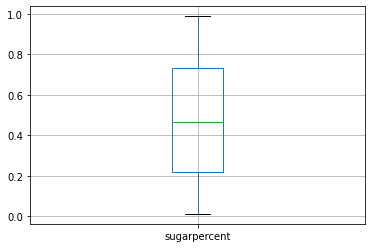

In [11]:
candy_df.boxplot(column=['sugarpercent'])

<AxesSubplot:>

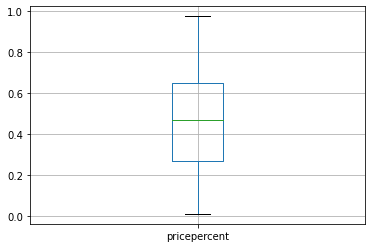

In [12]:
candy_df.boxplot(column=['pricepercent'])

<AxesSubplot:>

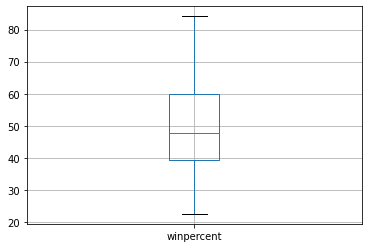

In [13]:
candy_df.boxplot(column=['winpercent'])

In [14]:
candy_df['sweetness'] = candy_df['chocolate']+candy_df['fruity']+candy_df['peanutyalmondy']+candy_df['caramel']+candy_df['nougat']

In [15]:
candy_df['sweetness'].describe()

count    85.000000
mean      1.294118
std       0.753145
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: sweetness, dtype: float64

In [16]:
sweet_df = pd.DataFrame()
sweet_df['sweetness'] = candy_df['sweetness']
sweet_df['sugarpercent'] = candy_df['sugarpercent']

In [17]:
sweet_df.sort_values(by=['sugarpercent'])

,sweetness,sugarpercent
2,0,0.011
3,0,0.011
51,2,0.034
30,1,0.046
12,1,0.046
...,...,...
61,1,0.941
60,1,0.941
38,2,0.965
70,1,0.965


In [18]:
sweet_df['sugarpercent'] = sweet_df['sugarpercent']*100

<BarContainer object of 85 artists>

Text(0.5, 1.0, 'Where does the sweetness come from')

Text(0.5, 0, 'Sweeteners')

Text(0, 0.5, 'Sugar percent')

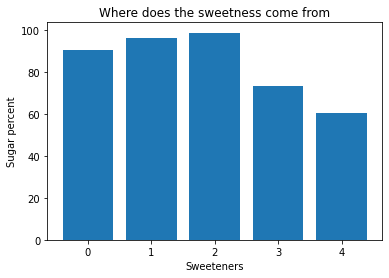

In [19]:
plt.bar(sweet_df['sweetness'],sweet_df['sugarpercent'])
plt.title("Where does the sweetness come from")
plt.xlabel("Sweeteners")
plt.ylabel("Sugar percent")
plt.show()

In [20]:
chocolate_df = pd.DataFrame()
chocolate_df['chocolate'] = candy_df['chocolate']
chocolate_df['winpercent'] = candy_df['winpercent']

<BarContainer object of 85 artists>

Text(0.5, 1.0, 'Impact of chocolate')

Text(0.5, 0, 'Chocolate')

Text(0, 0.5, 'Win percent')

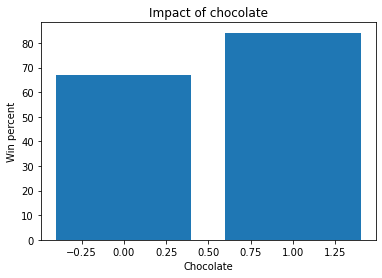

In [21]:
plt.bar(chocolate_df['chocolate'],chocolate_df['winpercent'],alpha=1)
plt.title("Impact of chocolate")
plt.xlabel("Chocolate")
plt.ylabel("Win percent")
plt.show()

In [22]:
# Get all features
features = [column_name for column_name in candy_df.columns if column_name != 'winpercent']

# Get all categorical features
categorical = [column_name for column_name in features if candy_df[column_name].dtype == 'object']

# Get all numeric columns
numeric = [column_name for column_name in features if column_name not in categorical]

<BarContainer object of 85 artists>

Text(0.5, 1.0, 'Impact of chocolate')

Text(0.5, 0, 'chocolate')

Text(0, 0.5, 'Win percent')

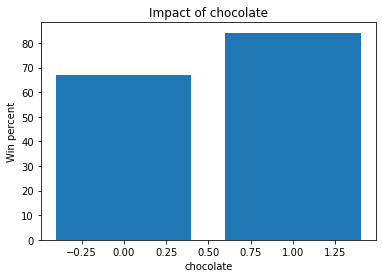

<BarContainer object of 85 artists>

Text(0.5, 1.0, 'Impact of fruity')

Text(0.5, 0, 'fruity')

Text(0, 0.5, 'Win percent')

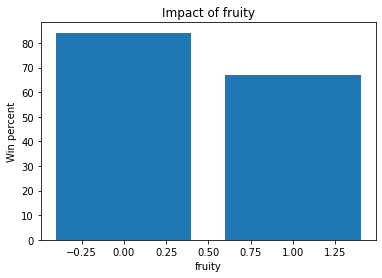

<BarContainer object of 85 artists>

Text(0.5, 1.0, 'Impact of caramel')

Text(0.5, 0, 'caramel')

Text(0, 0.5, 'Win percent')

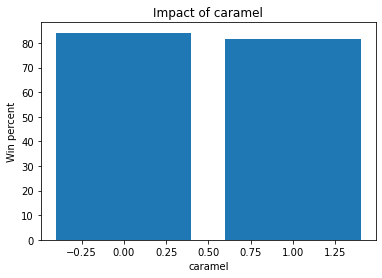

<BarContainer object of 85 artists>

Text(0.5, 1.0, 'Impact of peanutyalmondy')

Text(0.5, 0, 'peanutyalmondy')

Text(0, 0.5, 'Win percent')

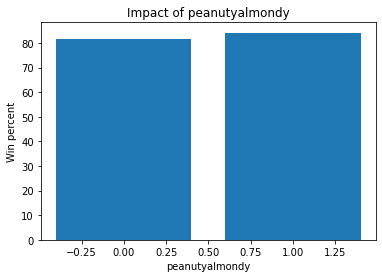

<BarContainer object of 85 artists>

Text(0.5, 1.0, 'Impact of nougat')

Text(0.5, 0, 'nougat')

Text(0, 0.5, 'Win percent')

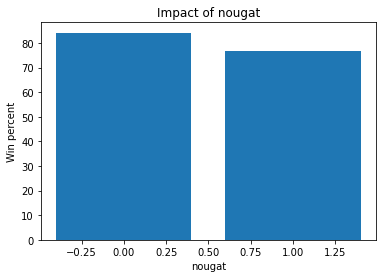

<BarContainer object of 85 artists>

Text(0.5, 1.0, 'Impact of crispedricewafer')

Text(0.5, 0, 'crispedricewafer')

Text(0, 0.5, 'Win percent')

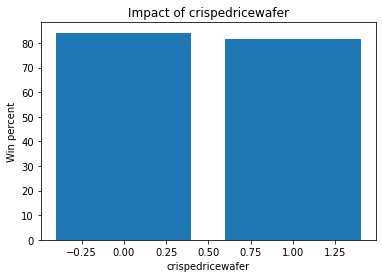

<BarContainer object of 85 artists>

Text(0.5, 1.0, 'Impact of hard')

Text(0.5, 0, 'hard')

Text(0, 0.5, 'Win percent')

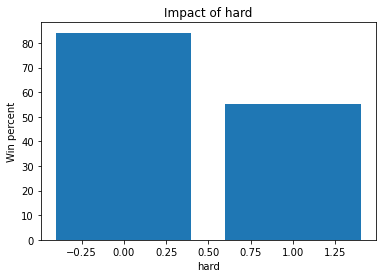

<BarContainer object of 85 artists>

Text(0.5, 1.0, 'Impact of bar')

Text(0.5, 0, 'bar')

Text(0, 0.5, 'Win percent')

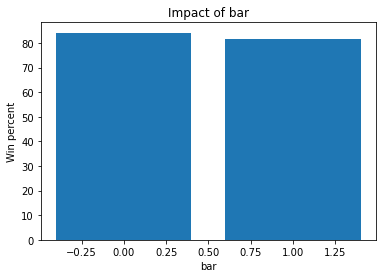

In [23]:
ingredients = ['chocolate',
               'fruity',
               'caramel',
               'peanutyalmondy',
               'nougat',
               'crispedricewafer',
               'hard',
               'bar', ]
for item in ingredients:
    plt.bar(candy_df[item], candy_df['winpercent'], alpha=1)
    plt.title("Impact of "+str(item))
    plt.xlabel(str(item))
    plt.ylabel("Win percent")
    plt.show()
    # sns.barplot(x=candy_df[item], y=candy_df['winpercent']).set_title("Impact of "+str(item))


In [47]:
candy_df['choconut'] = candy_df['chocolate'] * candy_df['peanutyalmondy']

Text(0.5, 1.0, 'Impact of Chocolate and peanut/almond')

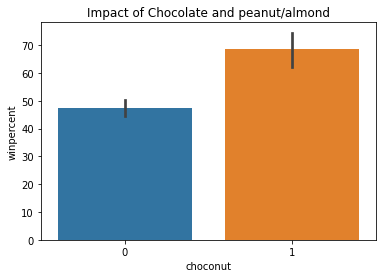

In [48]:
sns.barplot(x = candy_df['choconut'], y = candy_df['winpercent']).set_title('Impact of Chocolate and peanut/almond')

In [26]:
candy_df.drop('competitorname', axis = 1, inplace = True)#dropping the unique value
candy_df.drop('sweetness', axis = 1, inplace = True)

In [27]:
candy_df.drop('choconut', axis = 1, inplace = True)

In [28]:
# Get all features
features = [column_name for column_name in candy_df.columns if column_name != 'winpercent']

# Get all categorical features
categorical = [column_name for column_name in features if candy_df[column_name].dtype == 'object']

# Get all numeric columns
numeric = [column_name for column_name in features if column_name not in categorical]

In [29]:
X = candy_df[features]
# X = sm.add_constant(X)
Y = candy_df['winpercent']

In [30]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train test splits
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.20, random_state=123)

In [31]:
log_reg = sm.OLS(train_Y, train_X).fit()

In [32]:
# printing the summary table
print(log_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:             winpercent   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              64.95
Date:                Sun, 17 Oct 2021   Prob (F-statistic):                    9.25e-28
Time:                        15:37:51   Log-Likelihood:                         -280.73
No. Observations:                  68   AIC:                                      581.5
Df Residuals:                      58   BIC:                                      603.6
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [33]:
from statsmodels.tools.eval_measures import rmse
def get_RSME(model,test_X,test_Y):
    prediction = model.predict(test_X)
    rmse_value = rmse(test_Y, prediction)
    print('RMSE : '+str(rmse_value))
    return rmse_value


In [34]:
#Backward Stepwise selection based on p value
def run_model(data, features, target):
    X = data[features]
    Y = data[target]
    threshold = 0.05
    train_X, test_X, train_Y, test_Y = train_test_split(
        X, Y, test_size=0.20, random_state=123)
    results = sm.OLS(train_Y, train_X).fit()
    print(results.summary())
    get_RSME(results,test_X,test_Y)
    pvalues = results.pvalues.iloc[1:]
    worst_pval = pvalues.max()
    if worst_pval > threshold:
        worst_feature = pvalues.idxmax()
        features.remove(worst_feature)
        print(f"Removing: {pvalues.idxmax()} with p-value: {str(worst_pval)}")
        run_model(data, features, target)
    else:
        print(f"Best features are: {features}")


In [35]:
import copy
model_features = copy.deepcopy(features)
run_model(candy_df,model_features,'winpercent')

                                 OLS Regression Results                                
Dep. Variable:             winpercent   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              64.95
Date:                Sun, 17 Oct 2021   Prob (F-statistic):                    9.25e-28
Time:                        15:37:51   Log-Likelihood:                         -280.73
No. Observations:                  68   AIC:                                      581.5
Df Residuals:                      58   BIC:                                      603.6
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [36]:
#Backward Stepwise selection based on RMSE
def run_with_RMSE(data, features, target,threshold):
    X = data[features]
    Y = data[target]
    train_X, test_X, train_Y, test_Y = train_test_split(
        X, Y, test_size=0.20, random_state=123)
    results = sm.OLS(train_Y, train_X).fit()
    print(results.summary())
    currentRMSE = get_RSME(results, test_X, test_Y)
    pvalues = results.pvalues.iloc[1:]
    worst_pval = pvalues.max()
    if float(currentRMSE) >= float(threshold):
        worst_feature = pvalues.idxmax()
        features.remove(worst_feature)
        threshold = currentRMSE
        print(f"Removing: {pvalues.idxmax()} with p-value: {str(worst_pval)}")
        run_with_RMSE(data, features, target,threshold)
    else:
        print(f"Best features based on stepwise backward selection are: {features}")
        print(f"Best RMSE: {currentRMSE}")


In [37]:
model_features = copy.deepcopy(features)
run_with_RMSE(candy_df,model_features,'winpercent',get_RSME(log_reg,test_X,test_Y))

RMSE : 10.625717895625781
                                 OLS Regression Results                                
Dep. Variable:             winpercent   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              64.95
Date:                Sun, 17 Oct 2021   Prob (F-statistic):                    9.25e-28
Time:                        15:37:51   Log-Likelihood:                         -280.73
No. Observations:                  68   AIC:                                      581.5
Df Residuals:                      58   BIC:                                      603.6
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
---------

In [38]:
#complex model
x = candy_df[features]
y = candy_df['winpercent']
y
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.20, random_state=123)

import datetime
from sklearn.tree import DecisionTreeRegressor
begin_time = datetime.datetime.now()
treemodel =DecisionTreeRegressor(max_depth=3)
treemodel.fit(train_x, train_y)
print(datetime.datetime.now() - begin_time)

0     66.971725
1     67.602936
2     32.261086
3     46.116505
4     52.341465
        ...    
80    45.466282
81    39.011898
82    44.375519
83    41.904308
84    49.524113
Name: winpercent, Length: 85, dtype: float64

DecisionTreeRegressor(max_depth=3)

0:00:00.016720


<Figure size 1800x1440 with 0 Axes>

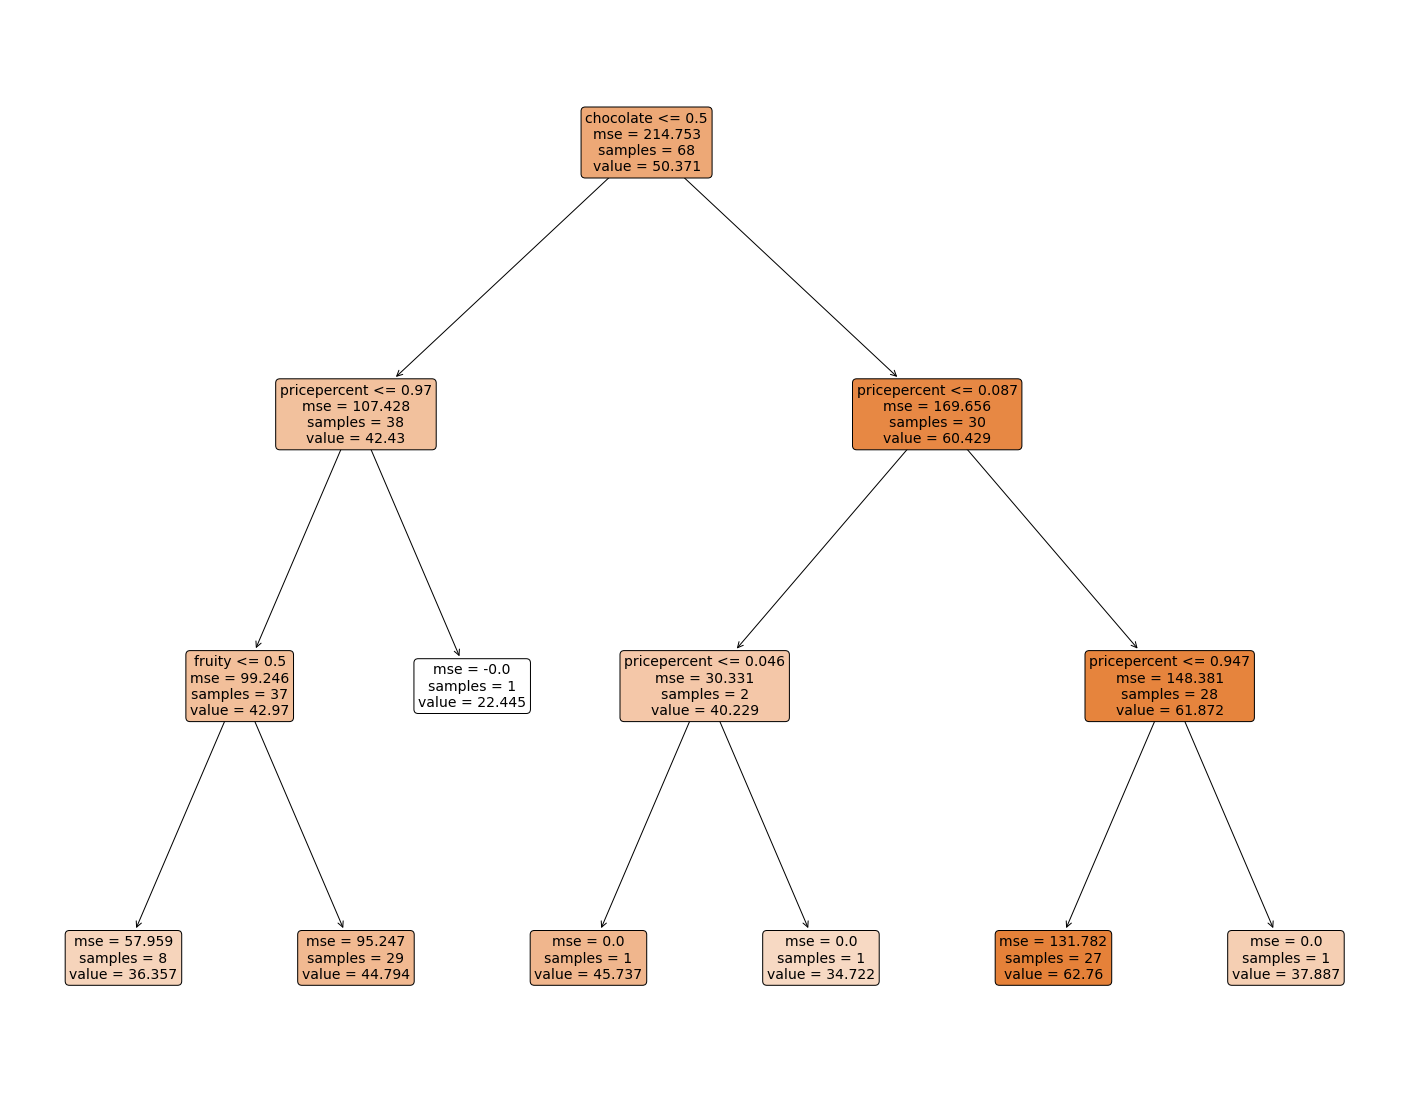

In [39]:
from sklearn import tree
plt.figure(figsize=(25,20))
plot=tree.plot_tree(treemodel, feature_names=x.columns.values.tolist(),class_names=['0','1'], filled=True, rounded=True,fontsize=14)

In [40]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

In [41]:
from sklearn.ensemble import RandomForestRegressor
begin_time = datetime.datetime.now()
rfclass=RandomForestRegressor(n_estimators=5000,random_state=0)
res= rfclass.fit(train_x, train_y)
rfypred=rfclass.predict(test_x)
print(datetime.datetime.now() - begin_time)

0:00:04.083635


In [42]:
rfclass.score(test_x,test_y)

0.542506896908804

Feature: 0, Score: 0.36886
Feature: 1, Score: 0.02761
Feature: 2, Score: 0.03106
Feature: 3, Score: 0.04815
Feature: 4, Score: 0.01104
Feature: 5, Score: 0.02798
Feature: 6, Score: 0.03111
Feature: 7, Score: 0.02379
Feature: 8, Score: 0.21423
Feature: 9, Score: 0.21617


<BarContainer object of 10 artists>

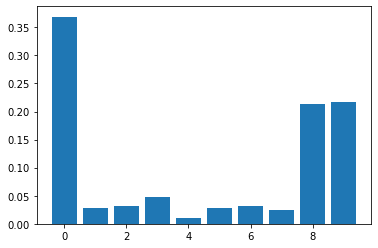

In [43]:
import matplotlib.pyplot as plt1
importance = rfclass.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt1.bar([x for x in range(len(importance))], importance)
plt1.show()

In [44]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test_y, rfypred)**0.5
print("RMSE",RMSE)

RMSE 9.819351366277928
